# Day 20: Advanced Feature Selection and Importance in Python - With Iris Dataset

In this lesson, we'll explore advanced feature selection techniques and delve into understanding feature importance in depth. We will use the Iris dataset for practical demonstrations, ensuring that concepts are not only theoretically sound but also practically applicable.

## Objectives:

1.  **Advanced Understanding of Feature Selection:** Deepen your understanding of the significance of feature selection in enhancing model performance and interpretability.
2.  **Explore Advanced Techniques:** Learn and apply various sophisticated techniques for feature selection and evaluate feature importance in detail.
3.  **Hands-on Activities:** Implement advanced feature selection techniques using the Iris dataset to gain practical experience.
4.  **Comprehensive Homework Assignment:** Test your understanding and skills on a new dataset, applying advanced feature selection techniques and documenting your findings comprehensively.

 - **Dataset:** https://github.com/100daysofml/100daysofml.github.io/blob/main/content/Week_04/Iris.csv

# Part 1: Advanced Introduction to Feature Selection

Feature selection stands at the heart of model building, not merely as a technique to enhance model performance but as a crucial process to deepen your understanding of the underlying data, reduce model complexity, and elevate the interpretability of the model. Let's delve deeper into the key concepts of Entropy, Information Gain, and Gini Impurity, which are fundamental in understanding feature selection, especially in the context of decision trees and information theory.

## Entropy

Entropy, in the context of information theory and machine learning, is a measure of the uncertainty or randomness in a dataset. It's a core concept in decision trees for feature selection.

### **Formula:** $Entropy(S) = -\sum_{i=1}^{n} p_i \log_2 p_i$ 
where:
-   $Entropy(S)$ is the entropy of the dataset $S$.
-   $\sum_{i=1}^{n}$ denotes the summation over all classes $i$ in the dataset.
-   $p_i$ represents the proportion (frequency or probability) of class $i$ in the dataset $S$.
-   $\log_2 p_i$ is the logarithm base 2 of $p_i$, indicating the contribution of class $i$ to the entropy of the dataset.
-   $n$ is the total number of classes.

### Interpretation

-   **Higher Entropy:** Indicates more randomness or unpredictability in the dataset.
-   **Lower Entropy:** Indicates less randomness or more order in the dataset.

## Information Gain

Information Gain is the measure of the difference in entropy from before to after the set SS is split on an attribute AA. It's used in the construction of decision trees.

### **Formula:** $InformationGain(S, A) = Entropy(S) - \sum_{v \in A} \frac{|S_v|}{|S|} Entropy(S_v)$
where:
-   $InformationGain(S, A)$ is the information gain from splitting set $S$ based on attribute $A$.
-   $Entropy(S)$ is the entropy of the entire set $S$.
-   $\sum$ denotes the summation over all unique values $v$ of attribute $A$.
-   $|S_v|$ is the size of the subset $S_v$ which contains all elements in $S$ for which attribute $A$ has value $v$.
-   $|S|$ is the size of the entire set $S$.
-   $Entropy(S_v)$ is the entropy of the subset $S_v$.

### Interpretation

-   **Higher Information Gain:** Indicates that splitting the dataset on attribute $AA$ provides a more defined, ordered subset.
-   **Lower Information Gain:** Indicates that the attribute AA does not bring much order or distinction if the dataset is split based on it.

## Gini Impurity vs Entropy

Both Gini Impurity and Entropy are measures used to choose the best split in decision trees. However, they have different computational properties.

### Gini Impurity

-   **Formula:** $Gini(S) = 1 - \sum_{i=1}^{n} p_i^2$ 
where:
-   $Gini(S)$ represents the Gini impurity of the dataset $S$.
-   $\sum_{i=1}^{n}$ denotes the summation over all classes $i$ in the dataset.
-   $p_i$ represents the proportion (frequency or probability) of class $i$ in the dataset $S$.
-   $p_i^2$ is the squared proportion of class $i$, indicating the contribution of class $i$ to the Gini impurity of the dataset.
-   $n$ is the total number of classes.
-   **Interpretation:** A measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
-   **Computational Aspect:** Generally faster to compute than entropy, as it doesn't involve logarithms.

### Entropy

-   As defined previously, entropy is a measure of randomness or uncertainty.
-   **Computational Aspect:** Involves the use of logarithms, making it computationally more intensive than Gini Impurity.

### When to Use Which?

-   **Gini Impurity:**
    
    -   Preferred when computational cost is a concern and when dealing with a large number of classes.
    -   Used by default in many algorithms due to its computational efficiency.
-   **Entropy:**
    
    -   Might lead to more balanced trees.
    -   Preferred when the goal is to reduce randomness or uncertainty in the dataset as much as possible.

In practice, the choice between Gini Impurity and Entropy might not significantly affect the performance of the decision tree, and often, the choice is based on computational considerations. However, it's essential to understand the conceptual differences and the impact they might have on the model's performance and the interpretability of the results.

In applying the concepts of Entropy, Information Gain, and Gini Impurity to the Iris dataset, we'll embark on a journey of understanding these measures in a practical context and using them for feature selection and decision tree construction. Let's break down the process into conceptual understanding, Python code implementation, and analytical thinking.

## Activity #1: 
## Step 1: Conceptual Understanding

Before jumping into the code, let's understand what these measures imply in the context of the Iris dataset:

-   The **Iris dataset** consists of 150 samples from three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Four features are measured from each sample: the lengths and the widths of the sepals and petals.
    
-   **Entropy** will help us understand the disorder or unpredictability in the species classification based on the features.
    
-   **Information Gain** will be used to decide which feature (sepal length, sepal width, petal length, petal width) effectively splits the data into homogeneous sets of species.
    
-   **Gini Impurity** will be a criterion to measure the impurity or purity of the species classification when we split the dataset based on a specific feature.

## Step 2: Python Code Implementation

Let's implement these concepts using Python. We'll use the `DecisionTreeClassifier` from `sklearn.tree` which allows us to visualize the importance of each feature according to entropy and Gini impurity.

Accuracy using Entropy: 0.9777777777777777
Accuracy using Gini Impurity: 1.0


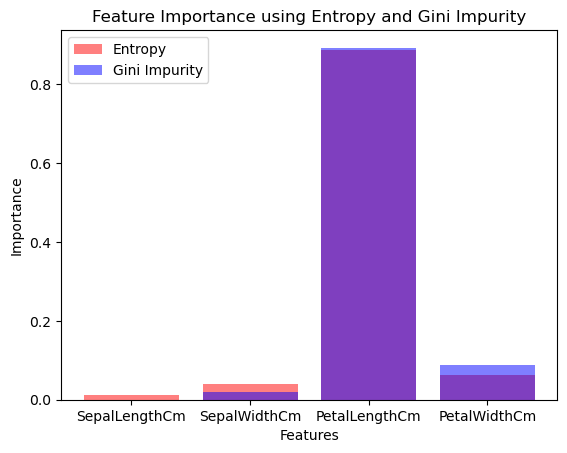

In [3]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_data = pd.read_csv('Iris.csv')
X = iris_data.drop(['Id', 'Species'], axis=1)  # independent variables
y = iris_data['Species']  # dependent variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
print(f'Accuracy using Entropy: {accuracy_score(y_test, y_pred_entropy)}')

# Decision Tree Classifier using Gini Impurity
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
print(f'Accuracy using Gini Impurity: {accuracy_score(y_test, y_pred_gini)}')

# Feature importance
importances_entropy = clf_entropy.feature_importances_
importances_gini = clf_gini.feature_importances_
features = X.columns

# Plotting feature importances
plt.bar(features, importances_entropy, color='r', alpha=0.5, label='Entropy')
plt.bar(features, importances_gini, color='b', alpha=0.5, label='Gini Impurity')
plt.title('Feature Importance using Entropy and Gini Impurity')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend()
plt.show()

## Step 3: Analytical Thinking

When analyzing the output:

1.  **Accuracy Assessment:** Compare the model accuracy using entropy and Gini impurity. Does one criterion lead to better performance?
    
2.  **Feature Importance Analysis:** Observe which features are considered most important by each criterion. Do entropy and Gini impurity agree on the importance of the features?
    
3.  **Decision Making:** Based on the feature importance, decide which features might be worth keeping and which might be redundant. This is where you use feature selection to potentially reduce the dimensionality of your problem.
    
4.  **Further Exploration:** Can you tweak the model or its parameters to improve performance? Consider pruning the tree or trying different parameters for `DecisionTreeClassifier`.
    
## Part 2: Advanced Techniques for Feature Selection (30 minutes)

### Filter Methods

### Mutual Information

-   **Concept:** Mutual Information quantifies the amount of information obtained about one random variable by observing another random variable. It can detect both linear and non-linear relationships.
    
-   **Formula:** $I(X; Y) = \sum_{x \in X, y \in Y} p(x, y) \log \left( \frac{p(x, y)}{p(x) p(y)} \right)$ 

where:

-  $I(X;Y)I(X;Y)$ is the mutual information for variables $X$ and $Y$,
-   $p(x,y)p(x,y)$ is the joint probability distribution function of $X$ and $Y$,
-   $p(x)p(x)$ and $p(y)p(y)$ are the marginal probability distribution functions of $X$ and $Y$ respectively.

### Best Practices

1.  **Understand Your Data:** Ensure you understand the data types (continuous or discrete) because Mutual Information can be applied to both, but the method of estimation might differ.
    
2.  **Data Preprocessing:** Properly preprocess your data (e.g., handling missing values, scaling/normalizing) as Mutual Information can be sensitive to the way data is presented.
    
3.  **Variable Discretization (if needed):** If dealing with continuous variables, discretize them properly. The choice of bins (or the method of discretization) can significantly affect the results.
    
4.  **Use Reliable Estimators:** Mutual Information estimation can be tricky, especially for continuous variables. Use reliable estimators or packages that are well-documented and widely used.
    

### Do's

1.  **Do Normalize the Data:** If your dataset features vary in scales or units, consider normalizing the data as Mutual Information is not scale-invariant.
    
2.  **Do Use for Non-linear Relationships:** Leverage Mutual Information to capture non-linear relationships between variables where traditional linear methods like Pearson correlation might fail.
    
3.  **Do Consider Dimensionality:** Mutual Information is particularly useful in high-dimensional settings where other methods might suffer from the curse of dimensionality.
    
4.  **Do Cross-Validation:** When selecting features based on Mutual Information, use cross-validation to ensure that the feature selection process generalizes well to unseen data.
    

### Don'ts

1.  **Don't Ignore the Context:** Mutual Information does not indicate the nature of the relationship (whether it's causal or just associative). Be cautious when interpreting the results.
    
2.  **Don't Rely Solely on It for Feature Selection:** While Mutual Information is powerful, it should be part of a broader feature selection strategy, especially in complex or high-dimensional datasets.
    
3.  **Don't Ignore Computational Cost:** Especially with large datasets and many features, the computation of Mutual Information can be intensive. Consider the computational cost in your analysis pipeline.
    
4.  **Don't Misinterpret the Values:** Mutual Information values are not bounded to a specific range like some other statistics (e.g., correlation coefficients). Understand the scale of Mutual Information values in the context of your data.

### **Python Implementation:**

# Interpret the results carefully, considering the nature of your data and the requirements of your analysis.` 

In this code snippet, we standardize the features using `StandardScaler` before computing Mutual Information. This is especially important if the features are on different scales. The results of Mutual Information are then printed, but it's crucial to interpret these results within the context of your specific dataset and problem.

In [5]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Load your data
iris_data = pd.read_csv('Iris.csv')

# Preprocess the data: Separate features and target, standardize the features
# Corrected drop method usage
X = iris_data.drop('Species', axis=1)  # independent columns
X_normalized = StandardScaler().fit_transform(X)  # Normalize the features
y = iris_data['Species']    # target column

# Compute mutual information
mi = mutual_info_classif(X_normalized, y)
print(mi)

[1.08486414 0.49537028 0.24562179 0.9858617  0.99351315]


## ANOVA F-test in Detail

### Concept

The ANOVA (Analysis of Variance) F-test is used to assess the differences between the means of three or more groups based on sample data. It's a way to check if the means of different groups are significantly different and is commonly used in feature selection when dealing with numerical input and categorical output.

### Formula

The F-statistic is calculated as:

$$
F = \frac{\text{Between-Group Variability}}{\text{Within-Group Variability}}
$$

Where:

-   **Between-Group Variability** (Mean Square Between) measures how much the group means deviate from the overall mean.
-   **Within-Group Variability** (Mean Square Error) measures the variance within each of the groups.

The F-statistic follows an F-distribution with degrees of freedom $df1=k−1$ and $df2=N−k$, where $k$ is the number of groups and $N$ is the total number of observations.

### Best Practices

1.  **Normality:** Each group should be approximately normally distributed. You can use a normality test like the Shapiro-Wilk test.
2.  **Homogeneity of variances:** The variances among the groups should be approximately equal. This can be checked using tests like Levene's test or Bartlett's test.
3.  **Independence:** The observations should be independent of each other.

### Do's

1.  **Do use ANOVA when comparing three or more groups:** ANOVA is specifically designed for this and is more reliable than using multiple t-tests.
2.  **Do check assumptions:** Ensure that the data meets the normality, homogeneity of variances, and independence assumptions.
3.  **Do perform post-hoc testing if ANOVA is significant:** This helps to determine which specific groups have significant differences.

### Don'ts

1.  **Don't use ANOVA for non-normal data without transformation:** Consider transforming the data or using non-parametric methods if the data is not normal.
2.  **Don't ignore significant interactions:** If you're conducting a factorial ANOVA, be aware of interaction effects between factors.

### **Python Implementation:**

In this code, `SelectKBest` with `f_classif` is used to select features based on the ANOVA F-test. This provides not just the F-score but also the p-value for each feature, giving you a sense of how confident you can be in the statistical significance of the results.

In [8]:
import pandas as pd
from sklearn.feature_selection import f_classif, SelectKBest

# Load your data
iris_data = pd.read_csv('Iris.csv')

# Corrected drop method usage
X = iris_data.drop('Species', axis=1)  # independent columns
y = iris_data['Species']    # target column

# Selecting the top k features
k_best_features = SelectKBest(score_func=f_classif, k='all')
fit = k_best_features.fit(X, y)

# Get the p-values for the feature scores
p_values = fit.pvalues_

# Print the feature scores and p-values
for i in range(len(fit.scores_)):
    print(f'Feature {i}: {fit.scores_[i]:.6f}, p-value: {p_values[i]:.6f}')

Feature 0: 588.235294, p-value: 0.000000
Feature 1: 119.264502, p-value: 0.000000
Feature 2: 47.364461, p-value: 0.000000
Feature 3: 1179.034328, p-value: 0.000000
Feature 4: 959.324406, p-value: 0.000000


## Wrapper Methods: Stepwise Regression

### Concept

Stepwise regression is a systematic method of adding and removing variables based on their statistical significance in a regression model. It's an iterative method that combines both forward selection and backward elimination techniques.

### Python Pseudo Code Example

(Note: This is a simplified implementation and may require adjustments based on the specific dataset or problem.)

### Best Practices, Do's, and Don'ts

-   **Do**:
    -   Do use cross-validation to validate the model performance with the selected features.
    -   Do consider the computational cost, as stepwise regression can be computationally intensive with large datasets.
-   **Don't**:
    -   Don't overfit the model by including too many variables.
    -   Don't rely solely on p-values to justify the inclusion or exclusion of a variable; consider the model's predictive power and practical significance.

In [12]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Load and prepare the Iris dataset
iris_data = pd.read_csv('Iris.csv')
X = iris_data.drop('Species', axis=1)

# Convert categorical variable 'Species' into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(iris_data['Species'])

# Forward Selection Function
def forward_selection(X, y, significance_level=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[best_features + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

# Apply Forward Selection
selected_features = forward_selection(X, y)
print("Selected features:", selected_features)


Selected features: ['PetalWidthCm', 'Id', 'PetalLengthCm', 'SepalLengthCm']


### Embedded Methods: Random Forest Feature Importance

### Concept

Random forests measure feature importance by looking at how much the tree nodes that use that feature reduce impurity across all trees in the forest. It's a built-in method that provides a score for each feature, indicating how useful they are at predicting the target variable.

### **Python Implementation:**

### Best Practices, Do's, and Don'ts

-   **Do**:
    -   Do use feature importance as a part of exploratory data analysis to understand your data better.
    -   Do visualize the feature importances to communicate the results effectively.
-   **Don't**:
    -   Don't interpret the feature importance values as causal effects.
    -   Don't rely on default settings for the Random Forest; fine-tuning the hyperparameters can significantly affect the model's performance and the computed importance scores.

In applying these methods, it's crucial to interpret the results correctly and in the context of your specific problem. Always remember that feature selection is not just a purely statistical exercise; it involves domain knowledge, understanding the context of the data, and iterative experimentation to find the best set of features for your model.

In [14]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Load and prepare the Iris dataset
iris_data = pd.read_csv('Iris.csv')
X = iris_data.drop('Species', axis=1)

# Convert categorical variable 'Species' into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(iris_data['Species'])

# Forward Selection Function
def forward_selection(X, y, significance_level=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[best_features + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

# Apply Forward Selection
selected_features = forward_selection(X, y)
print("Selected features:", selected_features)

Selected features: ['PetalWidthCm', 'Id', 'PetalLengthCm', 'SepalLengthCm']


## Step 3: Analytical Thinking with Python Implementation

### 1. Accuracy Assessment

We'll compare the accuracy of models built using Entropy and Gini Impurity as criteria for splitting in the decision tree.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load and prepare the Iris dataset
iris_data = pd.read_csv('Iris.csv')
X = iris_data.drop(['Id', 'Species'], axis=1)
y = iris_data['Species']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model with Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Model with Gini Impurity
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(f'Accuracy using Entropy: {accuracy_entropy}')
print(f'Accuracy using Gini Impurity: {accuracy_gini}')

Accuracy using Entropy: 0.9777777777777777
Accuracy using Gini Impurity: 1.0


### 2. Feature Importance Analysis

We'll compare which features are deemed most important by the decision trees using Entropy and Gini Impurity criteria.

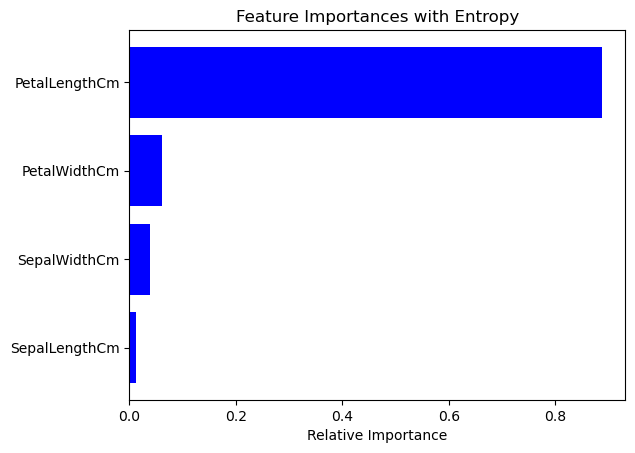

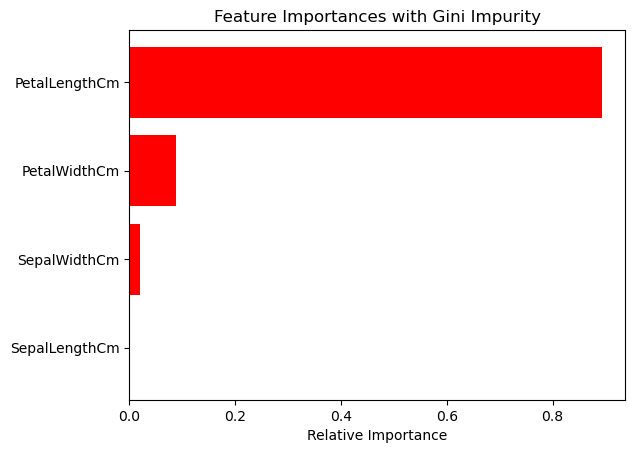

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from the model using Entropy
importances_entropy = clf_entropy.feature_importances_

# Feature importance from the model using Gini Impurity
importances_gini = clf_gini.feature_importances_

# Plotting feature importances
indices = np.argsort(importances_entropy)
plt.figure(1)
plt.title('Feature Importances with Entropy')
plt.barh(range(len(indices)), importances_entropy[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

indices = np.argsort(importances_gini)
plt.figure(2)
plt.title('Feature Importances with Gini Impurity')
plt.barh(range(len(indices)), importances_gini[indices], color='r', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 3. Decision Making

Based on the feature importance analysis, decide which features to keep.

In [19]:
# Threshold for selecting features, e.g., mean importance
threshold = np.mean(importances_entropy)

# Features to keep based on Entropy
features_to_keep_entropy = X.columns[importances_entropy > threshold]
print('Features to keep based on Entropy:', features_to_keep_entropy)

# Features to keep based on Gini Impurity
features_to_keep_gini = X.columns[importances_gini > threshold]
print('Features to keep based on Gini Impurity:', features_to_keep_gini)

Features to keep based on Entropy: Index(['PetalLengthCm'], dtype='object')
Features to keep based on Gini Impurity: Index(['PetalLengthCm'], dtype='object')


### 4. Further Exploration

Experiment with different parameters or pruning the tree to see if it improves model performance.

This analytical process involves not just running code but interpreting the results, making informed decisions, and continually iterating to refine your approach. By combining technical skills with critical thinking, you're moving beyond coding into the realm of data science and analytics.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming iris_data is your DataFrame
iris_data = pd.read_csv('Iris.csv')
X = iris_data.drop(['Species'], axis=1)
y = iris_data['Species']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree with Entropy
clf_entropy_deep = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf_entropy_deep.fit(X_train, y_train)
y_pred_entropy_deep = clf_entropy_deep.predict(X_test)
print(f'Accuracy with deeper tree using Entropy: {accuracy_score(y_test, y_pred_entropy_deep)}')

# Decision Tree with Gini Impurity
clf_gini_deep = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf_gini_deep.fit(X_train, y_train)
y_pred_gini_deep = clf_gini_deep.predict(X_test)
print(f'Accuracy with deeper tree using Gini Impurity: {accuracy_score(y_test, y_pred_gini_deep)}')

Accuracy with deeper tree using Entropy: 1.0
Accuracy with deeper tree using Gini Impurity: 1.0


### **Additional Resources (Advanced Feature Selection):**

- https://victorzhou.com/blog/information-gain/
- https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
- https://medium.com/mlearning-ai/feature-selection-techniques-in-machine-learning-82c2123bd548
- https://medium.com/codex/decision-tree-for-classification-entropy-and-information-gain-cd9f99a26e0d
- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- https://neptune.ai/blog/feature-selection-methods
- https://www.geeksforgeeks.org/feature-selection-techniques-in-machine-learning/
- https://www.kdnuggets.com/2023/06/advanced-feature-selection-techniques-machine-learning-models.html